In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [2]:
#Set all our values from the question
a_min = 0
a_max = 15
b_min = 0
b_max = 200
p_a = 0.99
p_b = 0.3
p_d = 0.5
D = np.array([22, 27, 26, 32, 31, 25, 35, 26, 28, 23])

In [3]:
#Define ranges on possible a and b values
a_range = np.arange(0,16,1)
b_range = np.arange(0,201,1)

In [4]:
#Define a function for computing combinations
def comb(n, k):
    return factorial(n)/(factorial(k)*factorial(n-k))

In [5]:
#Define method for computing probability of C given a and b
def probability_c(a, b, k):
    prob_sum = 0
    for i in range(a+1):
        for j in range(b+1):
            if i+j == k:
                prob_sum += comb(a, i)*p_a**i*(1-p_a)**(a-i)*comb(b, j)*p_b**(j)*(1-p_b)**(b-(j))
    
    
    return prob_sum

In [6]:
#Define function for computing D given C
def probability_d(c, j):
    return comb(c,j-c)*p_d**(j-c)*(1-p_d)**(2*c-j)

In [7]:
#Set our priors for a and b
prob_a = 1/(a_max-a_min)
prob_b = 1/(b_max-b_min)

In [8]:
#Compute the the probability of observing D for each range of D
#Done in one function to simplify code later
prob_D = np.zeros((len(D)))
for n in range(len(D)):
    for a_iter in a_range:
        for b_iter in b_range:
            product = 1 
            for n_iter in range(n+1):
                sum_c_i = 0
                for c_iter in range(a_iter+b_iter+1):
                    if D[n_iter] >= c_iter and 2*c_iter >= D[n_iter]:
                        sum_c_i += prob_a*prob_b* probability_c(a_iter,b_iter,c_iter) * probability_d(c_iter, D[n_iter])
                product *= sum_c_i
            prob_D[n] += product

In [11]:
#Define function for computing the posteriors on a for given a value.
def posterior_a(a, n):
    #Intialise numberator which will come from our equations.
    numerator = 0
    for b_iter in b_range:
        #Intialise the product over each of our d observations
        product = 1
        for n_iter in range(n+1):
            #Intialise our sum for probability of c given a, b and d given c
            sum_c_i = 0
            for c_iter in range(a+b_iter+1):
                #To make sure we only consider the right indexes.
                if D[n_iter] >= c_iter and 2*c_iter >= D[n_iter]:
                    
                    sum_c_i +=  prob_a * prob_b* probability_c(a,b_iter,c_iter) * probability_d(c_iter, D[n_iter])
            
            product *= sum_c_i
                
        numerator += product
    
    #Here we have already calculated the probability of observing D
    denominator = prob_D[n]
    
    return numerator/denominator

In [12]:
def posterior_b(b, n):
    #Intialise numberator which will come from our equations.
    numerator = 0
    for a_iter in a_range:
        #Intialise the product over each of our d observations
        product = 1
        for n_iter in range(n+1):
            #Intialise our sum for probability of c given a, b and d given c
            sum_c_i = 0
            for c_iter in range(a_iter+b+1):
                #To make sure we only consider the right indexes.
                if D[n_iter] >= c_iter and 2*c_iter >= D[n_iter]:
                    sum_c_i +=  prob_a * prob_b* probability_c(a_iter,b,c_iter) * probability_d(c_iter, D[n_iter])
            
            product *= sum_c_i
                
        numerator += product
    
    #Here we have already calculated the probability of observing D    
    denominator = prob_D[n]
    
    return numerator/denominator

In [13]:
#Here we will calculate all our posteriors for a and b for each given data values.
a_posterior = [] 
b_posterior = []

for n in range(len(D)):
    a_post = []
    b_post = []
    for a in a_range:
        a_post.append(posterior_a(a,n))

    for b in b_range:
        b_post.append(posterior_b(b,n))
        
    a_posterior.append(a_post)
    b_posterior.append(b_post)

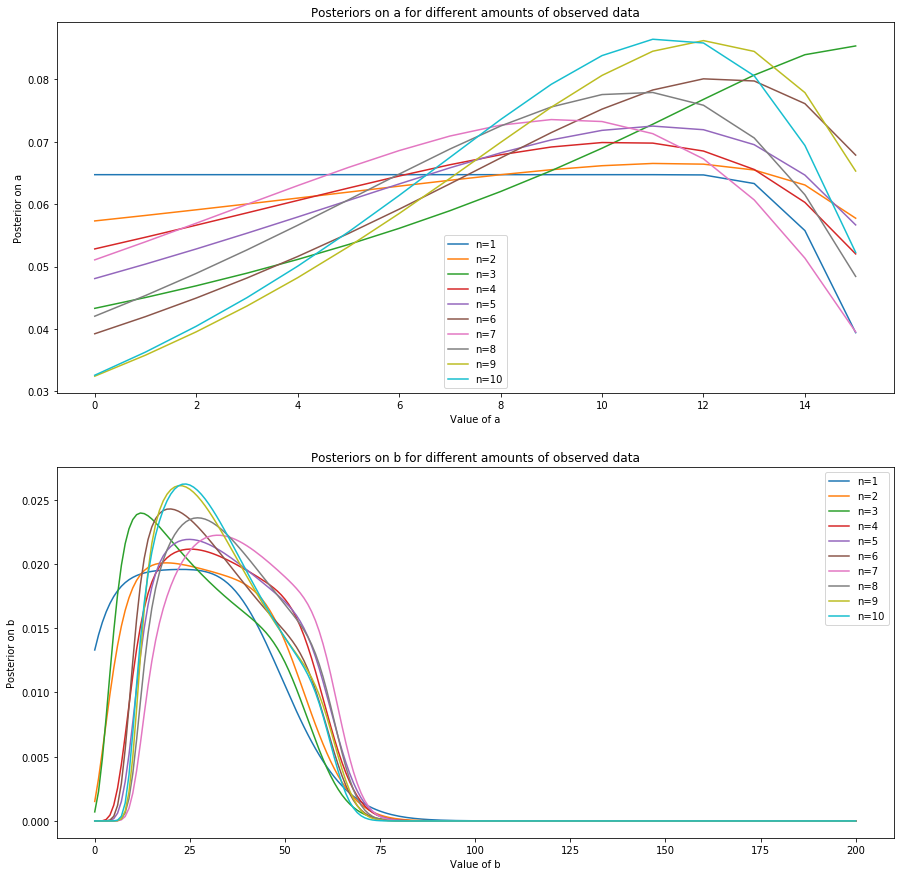

In [17]:
#Now lets visalise our results

fig, ax = plt.subplots(2)
fig.set_figheight(15)
fig.set_figwidth(15)

for n in range(len(D)):
    y1 = a_posterior[n]
    ax[0].plot(a_range,y1, label='n=%i' %(n+1))
    y2=b_posterior[n]
    ax[1].plot(b_range,y2, label='n=%i' %(n+1))
    
    
ax[0].legend()
ax[0].set_xlabel('Value of a')
ax[0].set_ylabel('Posterior on a')
ax[0].set_title('Posteriors on a for different amounts of observed data')
ax[1].legend()
ax[1].set_xlabel('Value of b')
ax[1].set_ylabel('Posterior on b')
ax[1].set_title('Posteriors on b for different amounts of observed data')

plt.savefig('posterior_plots', dpi=300, bbox_inches='tight')

            
plt.show()

In [22]:
print(np.argmax(a_posterior[9]))
print(np.argmax(b_posterior[9]))

11
24
